In [ ]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Saving C Img (103).bmp to C Img (103).bmp
Uploaded: C Img (103).bmp


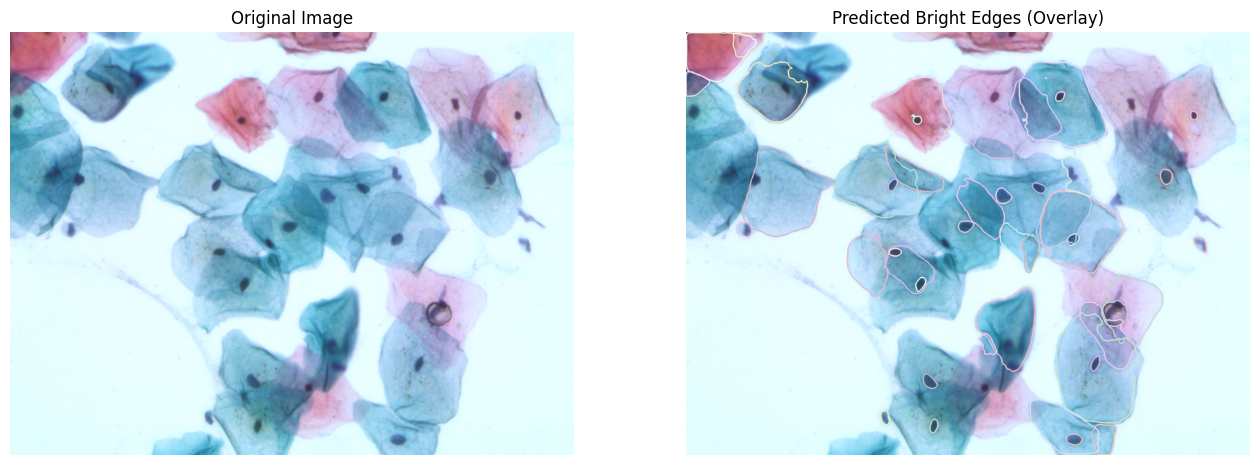

In [ ]:
# ==============================
# STEP 1: Setup for Inference
# ==============================
import cv2, torch
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
OUTPUT_DIR = "/content/drive/MyDrive/cervical_checkpoints"
# ==============================
# STEP 2: Load Config + Trained Weights
# ==============================
cfg = get_cfg()
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1   # only "cell"
cfg.MODEL.WEIGHTS = f"{OUTPUT_DIR}/model_0004999.pth"  # 🔥 trained weights
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)

# ==============================
# STEP 3: Upload & Run Inference
# ==============================
uploaded = files.upload()   # choose test image
test_img_path = list(uploaded.keys())[0]
print("Uploaded:", test_img_path)

image = cv2.imread(test_img_path)
outputs = predictor(image)

# ==============================
# STEP 4: Better Visualization# ==============================
# STEP 4: Better Visualization (Bright Edges)
# ==============================
# Original image (BGR -> RGB)
orig = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Copy for drawing
overlay = orig.copy()

if outputs["instances"].has("pred_masks"):
    masks = outputs["instances"].pred_masks.cpu().numpy()
    for mask in masks:
        # 🔥 pick a bright random color (values between 180–255)
        color = np.random.randint(180, 256, (3,), dtype=np.uint8).tolist()

        # Get contours of mask
        contours, _ = cv2.findContours(mask.astype(np.uint8),
                                       cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)

        # Draw contour edges (thicker for visibility)
        cv2.drawContours(overlay, contours, -1, color, 3)

# ==============================
# STEP 5: Show Side-by-Side
# ==============================
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(orig)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Predicted Bright Edges (Overlay)")
plt.imshow(overlay)
plt.axis("off")

plt.show()



## Option 2 detectron


In [ ]:
from google.colab import files
import cv2, torch
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer

# ==============================
# STEP 1: Upload Image
# ==============================
uploaded = files.upload()   # select your test image
test_img_path = list(uploaded.keys())[0]
print("Uploaded:", test_img_path)
cfg.MODEL.DEVICE = "cpu"

# ==============================
# STEP 2: Load Trained Model
# ==============================
cfg = get_cfg()
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0001999.pth")  # trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # confidence threshold
predictor = DefaultPredictor(cfg)

# ==============================
# STEP 3: Run Inference
# ==============================
im = cv2.imread(test_img_path)
outputs = predictor(im)

# ==============================
# STEP 4: Visualize
# ==============================
v = Visualizer(im[:, :, ::-1], metadata=paps_metadata, scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(10, 10))
plt.imshow(out.get_image())
plt.title("Predicted Overlapping Cells")
plt.axis("off")
plt.show()


#Visualizer two

Saving 00001.png to 00001 (3).png
Uploaded: 00001 (3).png
Using device: cuda
[09/19 12:16:29 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/cervical_checkpoints/model_final.pth ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


Number of predicted masks: 0


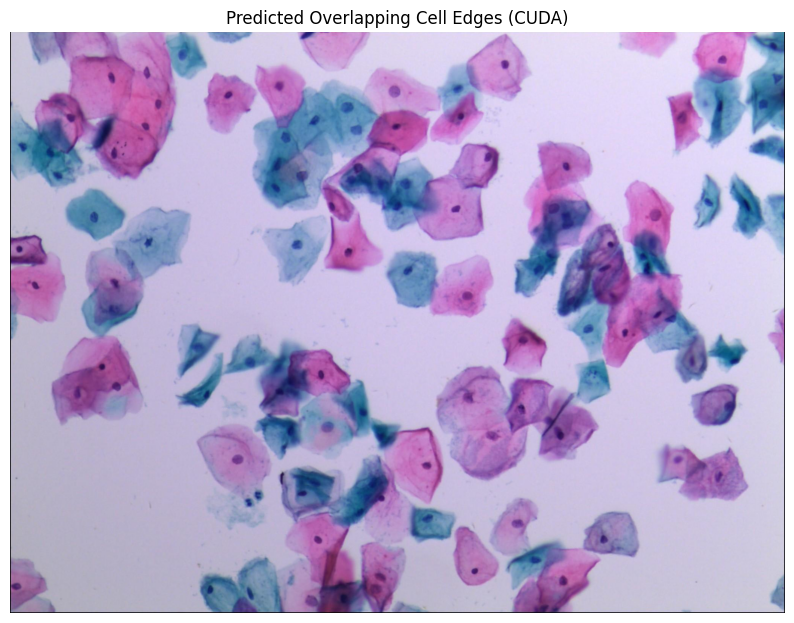

In [ ]:
from google.colab import files
import cv2, torch, os
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo

# ==============================
# STEP 1: Upload Image
# ==============================
uploaded = files.upload()   # select your test image
test_img_path = list(uploaded.keys())[0]
print("Uploaded:", test_img_path)

# Select device
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ==============================
# STEP 2: Load Trained Model
# ==============================
cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/drive/MyDrive/cervical_checkpoints"
cfg.MODEL.DEVICE = device  # set device dynamically

cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/cervical_checkpoints/model_final.pth"

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

# ==============================
# STEP 3: Run Inference
# ==============================
im = cv2.imread(test_img_path)
outputs = predictor(im)

# Get predicted masks
instances = outputs["instances"].to("cpu")
if instances.has("pred_masks"):
    masks = instances.pred_masks.numpy()
else:
    masks = []

print("Number of predicted masks:", len(masks))

# ==============================
# STEP 4: Draw Contour Edges Only
# ==============================
result = im.copy()  # work on a copy

for mask in masks:
    mask = (mask > 0.5).astype("uint8") * 255
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Draw bold, visible contours (bright green)
    cv2.drawContours(result, contours, -1, (0, 255, 0), thickness=3)

# ==============================
# STEP 5: Show Result
# ==============================
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Overlapping Cell Edges ({device.upper()})")
plt.axis("off")
plt.show()


# Models (Detectron2)


In [ ]:
# ==============================
# STEP 0: Install Detectron2
# ==============================
!pip install -U torch torchvision torchaudio
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

# ==============================
# STEP 1: Imports
# ==============================
import os, random, json
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data import detection_utils as utils
from detectron2.data import transforms as T
from detectron2.data import build_detection_train_loader, build_detection_test_loader
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.utils.visualizer import Visualizer

# ==============================
# STEP 2: Dataset Paths
# ==============================
DATA_DIR = "/content/drive/MyDrive/cervical_data"
IMG_DIR = os.path.join(DATA_DIR, "png")
ANN_DIR = os.path.join(DATA_DIR, "coco_annotations")

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')

print("Images dir:", IMG_DIR)
print("Annotations dir:", ANN_DIR)

# ==============================
# STEP 3: Register Datasets
# ==============================
# Load original dataset
register_coco_instances("papsmear_train_raw", {}, os.path.join(ANN_DIR, "train.json"), IMG_DIR)
register_coco_instances("papsmear_val", {}, os.path.join(ANN_DIR, "val.json"), IMG_DIR)

# ==============================
# STEP 4: Pre-filter training dataset
# ==============================
raw_dataset = DatasetCatalog.get("papsmear_train_raw")
filtered_dataset = []

for d in raw_dataset:
    annos = []
    for obj in d.get("annotations", []):
        # Keep only valid bboxes and segmentation
        if ("bbox" in obj and obj["bbox"][2] > 0 and obj["bbox"][3] > 0
            and ("segmentation" not in obj or obj.get("segmentation"))):
            annos.append(obj)
    if len(annos) > 0:
        filtered_dataset.append(d)

print(f"Original dataset: {len(raw_dataset)}, Filtered dataset: {len(filtered_dataset)}")

# Register filtered dataset
DatasetCatalog.register("papsmear_train", lambda: filtered_dataset)
MetadataCatalog.get("papsmear_train").set(thing_classes=["cell"])
paps_metadata = MetadataCatalog.get("papsmear_train")

# ==============================
# STEP 5: Custom Mapper (Robust)
# ==============================
def custom_mapper(dataset_dict):
    dataset_dict = dataset_dict.copy()
    image = utils.read_image(dataset_dict["file_name"], format="BGR")

    aug = T.AugmentationList([
        T.Resize((512, 512)),
        T.RandomFlip(prob=0.5, horizontal=True, vertical=False),
        T.RandomBrightness(0.9, 1.1),
        # Disable rotation for safety; re-enable with small angle if needed
        # T.RandomRotation(angle=[-5, 5])
    ])
    aug_input = T.AugInput(image)
    transforms = aug(aug_input)
    image = aug_input.image

    annos = []
    for obj in dataset_dict.get("annotations", []):
        try:
            ann = utils.transform_instance_annotations(obj, transforms, image.shape[:2])
            if ("bbox" in ann and ann["bbox"][2] > 0 and ann["bbox"][3] > 0
                and ("segmentation" not in ann or ann.get("segmentation"))):
                annos.append(ann)
        except Exception as e:
            print("Skipping invalid annotation in", dataset_dict["file_name"], e)
            continue

    dataset_dict["annotations"] = annos
    dataset_dict["image"] = torch.as_tensor(image.transpose(2,0,1).astype("float32"))
    return dataset_dict

# ==============================
# STEP 6: Trainer
# ==============================
class MyTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg):
        return build_detection_train_loader(cfg, mapper=custom_mapper)

# ==============================
# STEP 7: Config
# ==============================
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("papsmear_train",)
cfg.DATASETS.TEST = ("papsmear_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.DATALOADER.FILTER_EMPTY_ANNOTATIONS = True  # important

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only "cell"
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128

cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 5000
cfg.SOLVER.STEPS = []
cfg.SOLVER.CHECKPOINT_PERIOD = 1000

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# ==============================
# STEP 8: Train
# ==============================
trainer = MyTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# ==============================
# STEP 9: Evaluate
# ==============================
evaluator = COCOEvaluator("papsmear_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "papsmear_val")
results = inference_on_dataset(trainer.model, val_loader, evaluator)
print("Validation Results:", results)

# ==============================
# STEP 10: Inference & Visualization
# ==============================
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

# Pick a random validation image
with open(os.path.join(ANN_DIR, "val.json")) as f:
    val_data = json.load(f)

sample_img = random.choice(val_data["images"])["file_name"]
img_path = os.path.join(IMG_DIR, sample_img)
print("Testing on:", img_path)

im = cv2.imread(img_path)
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], metadata=paps_metadata, scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(10,10))
plt.imshow(out.get_image())
plt.axis("off")
plt.show()


In [ ]:
from google.colab import files
import cv2, torch, os
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer

# ==============================
# STEP 1: Upload Image
# ==============================
uploaded = files.upload()   # select your test image
test_img_path = list(uploaded.keys())[0]
print("Uploaded:", test_img_path)

# ==============================
# STEP 2: Load Trained Model (CPU only)
# ==============================
cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/drive/MyDrive/cervical_checkpoints"  # set your checkpoint folder
cfg.MODEL.DEVICE = "cpu"   # <-- Force CPU
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0001999.pth")  # trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # confidence threshold

predictor = DefaultPredictor(cfg)

# ==============================
# STEP 3: Run Inference
# ==============================
im = cv2.imread(test_img_path)
outputs = predictor(im)

# ==============================
# STEP 4: Visualize
# ==============================
v = Visualizer(im[:, :, ::-1], metadata=paps_metadata, scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(10, 10))
plt.imshow(out.get_image())
plt.title("Predicted Overlapping Cells (CPU)")
plt.axis("off")
plt.show()


[09/19 12:18:54 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/cervical_checkpoints/model_final.pth ...


Saving 00001.png to 00001 (4).png
Uploaded: 00001 (4).png


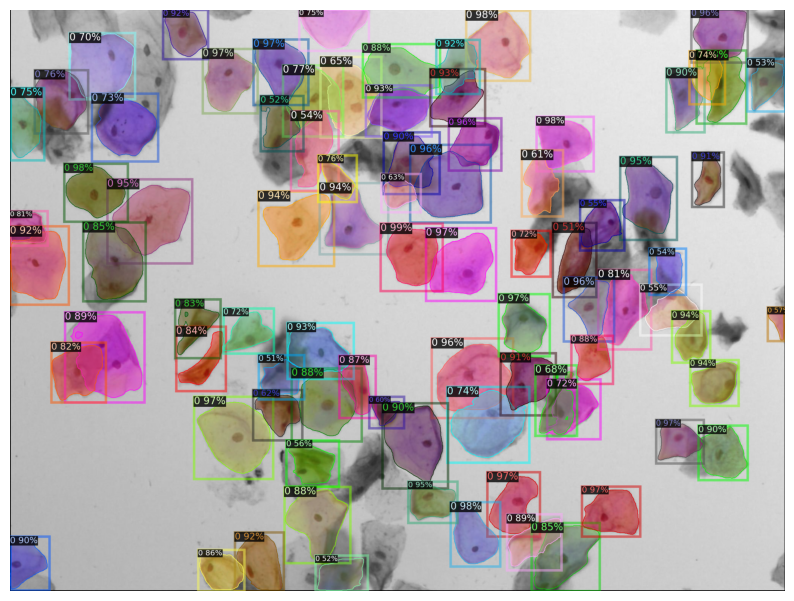

In [ ]:
# ==============================
# STEP 1: Setup for Inference
# ==============================
import cv2, torch
import matplotlib.pyplot as plt
from google.colab import files
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.config import get_cfg
from detectron2 import model_zoo

# ==============================
# STEP 2: Load Config + Trained Weights
# ==============================
cfg = get_cfg()
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1   # only "cell"
cfg.MODEL.WEIGHTS = f"{OUTPUT_DIR}/model_final.pth"  # 🔥 your trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)

# ==============================
# STEP 3: Upload & Run Inference
# ==============================
uploaded = files.upload()   # select your test image
test_img_path = list(uploaded.keys())[0]
print("Uploaded:", test_img_path)

image = cv2.imread(test_img_path)
outputs = predictor(image)

# ==============================
# STEP 4: Visualize Edge Overlap
# ==============================
v = Visualizer(
    image[:, :, ::-1],
    metadata=None,
    scale=1.0,
    instance_mode=ColorMode.IMAGE_BW  # background in grayscale
)

# Draw just masks (without bounding boxes)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(10, 10))
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis("off")
plt.show()
